In [1]:
using CausalForest
using Plots
using StatsBase

┌ Info: Precompiling CausalForest [31bdf679-24a7-499a-9be9-b214c66174ea]
└ @ Base loading.jl:1423


In [2]:
indices,X,T,Y = load_data("causal");
Xtest = rand(Float64, (1000, size(X, 2)));
Xtest[:, 1] =  LinRange(0, 1, 1000);
true_effect = Xtest[:, 1].>0.5;

# Subsampling not honest

In [ ]:
cf1 = build_forest_2(false, false, false, Y, T, X, false, -1, 1, 0.7, 0.5, -1, 10, 20);
print("fin")
pred1 = apply_forest_2(cf1, Xtest);

In [ ]:
pred1

In [ ]:
plot(Xtest[:, 1], [true_effect, pred1], label=["True effect" "Estimation"], title = "No centering no bootstrap no honest", fmt = :png)

In [ ]:
rmsd(float(true_effect), pred1)

In [ ]:
importance(cf1)

# Subsampling honest

In [9]:
cf3 = build_forest_1(false, false, true, Y, T, X, false, -1, 100);
pred3 = apply_forest_1(cf3, Xtest);

In [10]:
rmsd(float(true_effect), pred3)

0.11687687549539566

# Bootstrap not honest

In [11]:
cf5 = build_forest_1(false, true, false, Y, T, X, false, -1, 100);
pred5 = apply_forest_1(cf5, Xtest);

In [12]:
rmsd(float(true_effect), pred5)

0.244217823374944

# Bootstrap honest

In [13]:
cf7 = build_forest_1(false, true, true, Y, T, X, false, -1, 100);
pred7 = apply_forest_1(cf7, Xtest);

In [14]:
rmsd(float(true_effect), pred7)

0.14553663653599877

# 500 arbres

# Subsampling not honest

In [15]:
cf1 = build_forest_1(false, false, false, Y, T, X, false, -1, 500);
pred1 = apply_forest_1(cf1, Xtest);

In [16]:
rmsd(float(true_effect), pred1)

0.22255104971238066

# Subsampling honest

In [17]:
cf3 = build_forest_1(false, false, true, Y, T, X, false, -1, 500);
pred3 = apply_forest_1(cf3, Xtest);

In [18]:
rmsd(float(true_effect), pred3)

0.10422010575498047

# Bootstrap not honest

In [19]:
cf5 = build_forest_1(false, true, false, Y, T, X, false, -1, 500);
pred5 = apply_forest_1(cf5, Xtest);

In [20]:
rmsd(float(true_effect), pred5)

0.22448476408497128

# Bootstrap honest

In [21]:
cf7 = build_forest_1(false, true, true, Y, T, X, false, -1, 500);
pred7 = apply_forest_1(cf7, Xtest);

In [22]:
rmsd(float(true_effect), pred7)

0.1283746638066473

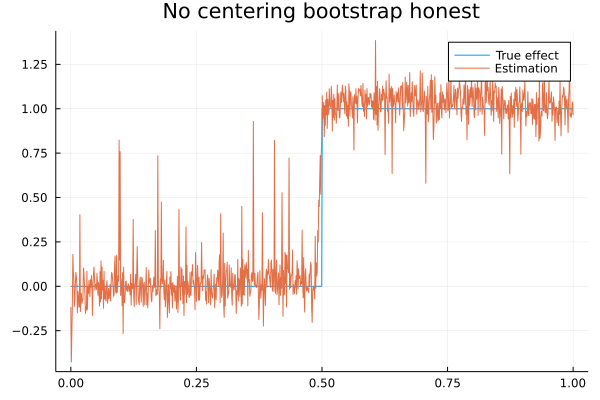

In [23]:
plot(Xtest[:, 1], [true_effect, pred7], label=["True effect" "Estimation"], title = "No centering bootstrap honest", fmt = :png)

In [25]:
importance(cf7)

10-element Vector{Float64}:
 0.12129028309028791
 0.07689532074726445
 0.05671183814611042
 0.1316037091205837
 0.06058117505168635
 0.05103547512627368
 0.17600944483052655
 0.18922265542080977
 0.06447286058255128
 0.07217723788390583